# Gridworld with First Visit

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from random import uniform
import random

In [2]:
actions = [[-1, 0], [0, 1], [1, 0], [0, -1]] #up, right, down, left = (clockwise from up) 
action_count = len(actions) # total number of actions
gridSize = 5 # create a square grid of gridSize by gridSize
state_count = gridSize*gridSize # total number of states

In [3]:
class Gridworld():
    def __init__(self, gridSize):
        self.valueMap = np.zeros((gridSize, gridSize))
        self.states = [[i, j] for i in range(gridSize) for j in range(gridSize)]
        self.size = gridSize
        self.new_pos = [0, 0] # initialize new position for p_transition
        self.transition_prob = 1 # deterministic
    
    def initial_state(self):        # return initial state
        return grid.states[gridSize*gridSize-1]
   
    def transition_reward(self, current_pos, action): # return the transition probability

        # get next position: state: [0, 0], action: [0, 1], new_state = [0, 1]
        self.new_pos = np.array(current_pos) + np.array(action)

        # normally, reward = 0
        reward = 0

        # if new pos results in off the grid, return reward -1
        if -1 in self.new_pos or self.size in self.new_pos:
            reward = -1
        # if in state A, receive + 10
        if current_pos == [0, 1]:
            reward = 10
        # if in state B, receive + 5
        if current_pos == [0, 3]:
            reward = 5

        # if taking an action crosses the border; agent's new_pos is the same as the current pos
        if -1 in self.new_pos or self.size in self.new_pos: 
            self.new_pos = current_pos
            
        # if in state A, transition to state A'
        if current_pos == [0, 1]:
            self.new_pos = [4, 1]
            
        # if in state B, transition to state B'
        if current_pos == [0, 3]:
            self.new_pos = [2, 3]

        return self.new_pos, reward

## Initiate Random Policy

In [4]:
# create a grid object
grid = Gridworld(5)

In [5]:
# Initiate a random policy
random_policy = np.random.randint(1000, size=(state_count, action_count))
random_policy = random_policy/random_policy.sum(axis=1)[:,None]
policy = random_policy

In [6]:
# random policy
policy

array([[0.22369819, 0.21997875, 0.22476089, 0.33156217],
       [0.35870865, 0.13830211, 0.24392188, 0.25906736],
       [0.23223039, 0.28584559, 0.29411765, 0.18780637],
       [0.12107843, 0.36617647, 0.3245098 , 0.18823529],
       [0.22950047, 0.45852969, 0.00848256, 0.30348728],
       [0.10138585, 0.15463166, 0.01531729, 0.72866521],
       [0.35053554, 0.47224927, 0.04333009, 0.1338851 ],
       [0.20220588, 0.40027574, 0.15211397, 0.24540441],
       [0.39785867, 0.29293362, 0.07965739, 0.22955032],
       [0.19278406, 0.48357566, 0.182014  , 0.14162628],
       [0.26300494, 0.23830282, 0.27927928, 0.21941296],
       [0.20545213, 0.16156915, 0.57646277, 0.05651596],
       [0.07874865, 0.02049622, 0.33225458, 0.56850054],
       [0.37101064, 0.31205674, 0.31693262, 0.        ],
       [0.45050879, 0.11748381, 0.07770583, 0.35430157],
       [0.15755026, 0.03319308, 0.46096307, 0.3482936 ],
       [0.27132028, 0.21762476, 0.26373973, 0.24731522],
       [0.066605  , 0.39592969,

## Define Functions

In [7]:
def generate_episode(steps):

    # set initial state
    state_vector = grid.initial_state()

    # initialize state (with iniitial state), action list and reward list
    state_list = [state_vector]
    action_list = []
    reward_list = []

    # generate an episode
    for i in range(steps):

        # pick an action based on categorical distribution in policy
        action_index = int(np.random.choice(action_count, 1, p=policy[grid.states.index(state_vector)])) 
        action_vector = actions[action_index] # convert the integer index (ie. 0) to action (ie. [-1, 0])

        # get new state and reward after taking action from current state
        new_state_vector, reward = grid.transition_reward(state_vector, action_vector)
        state_vector = list(new_state_vector)

        # save state, action chosen and reward to list
        state_list.append(state_vector)
        action_list.append(action_vector)
        reward_list.append(reward)
        
    return state_list, action_list, reward_list

In [8]:
# define average function
def Average(lst): 
    return sum(lst) / len(lst) 

## First Visit MC

In [9]:
# initialize q values for all state action pairs
Q_values = np.zeros((state_count, action_count))

# intialize parameters
gamma = 0.99
epsilon = 0.1

# iterate 500 times: each time, generating an episode of 200 steps
max_steps = 200

# Define lists for plots
average_reward_list = []
cumulative_reward_list = []
cumulative_reward = 0
delta_list = []
cumulative_test_reward_list = []

In [10]:
# define variables for keeping track of time steps
Terminal = max_steps
t_list=[]
for i in range(1,max_steps+1):
    t = Terminal - i
    t_list.append(t)

In [11]:
# iteration 500 times
for iteration in range(500):
  
    # generate an episode of specified step count
    state_list, action_list, reward_list = generate_episode(max_steps)
    
    # calculate average reward of each episode
    average_reward_list.append(Average(reward_list))
    
    # obtain cumulative reward for plotting
    cumulative_reward = cumulative_reward + sum(reward_list)
    cumulative_reward_list.append(cumulative_reward)

    # intialize variables
    G = 0
    delta = 0
    
    # initiate returns and visited list to none
    returns_list = []
    visited_list = []

    # loop for each step of episode: T-1, T-2, T-3 ... 0 = 199, 198, 197 ... 0
    for t in t_list:

        # calculate G: starting with the last reward at index t (naturally accounts for pseudocode's "t-1")
        G = gamma*G + reward_list[t]
        
        # combine state action pair, for example, state = [0,0], action = [0,1], state_action_pair = [0,0,0,1]
        state_action_pair = []
        state_action_pair.extend(state_list[t])
        state_action_pair.extend(action_list[t])

        # check if state action pair have been visited before (if not: continue, else: move to the next time step)
        if state_action_pair not in visited_list:

            # add state action pair to visited list
            visited_list.append(state_action_pair)

            # append G to returns
            returns_list.append(G)

            # find state and action index, for example, converting action [-1, 0] to 0, and same for state #
            state_index = grid.states.index(state_list[t])
            action_index = actions.index(action_list[t])

            # calculate max delta change for plotting max q value change
            delta = max(delta, np.abs(Average(returns_list) - Q_values[state_index][action_index]))      
            
            # write Q_values to the state-action pair
            Q_values[state_index][action_index] = Average(returns_list)

            # choose best action at given state
            choose_action = np.argmax(Q_values[state_index])

            # overwrite policy
            for a in range(action_count): # for action in actions [0, 1, 2, 3]
                if choose_action == a: # if the choose_action is the same as the current action
                    policy[state_index][a] = 1 - epsilon + epsilon/action_count 
                else: # if choose_action is not the same as the current action
                    policy[state_index][a] = epsilon/action_count
    
    # append delta to list
    delta_list.append(delta)
    
    # TEST POLICY after each episode
    # Generate test trajectory with the greedy policy
    state_list, action_list, test_reward_list = generate_episode(200)
    
    # sum up all the rewards obtained during test trajectory and append to list
    cumulative_test_reward_list.append(sum(test_reward_list))

## Plots 

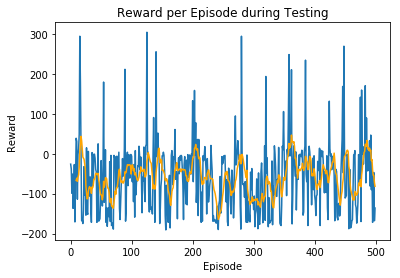

In [12]:
# test reward of each episode
plt.plot(cumulative_test_reward_list)
plt.title('Reward per Episode during Testing')
plt.xlabel('Episode')
plt.ylabel('Reward')

# plot moving average
delta_frame = pd.DataFrame(cumulative_test_reward_list)
rolling_mean = delta_frame.rolling(window=10).mean()
plt.plot(rolling_mean, label='Moving Average', color='orange')

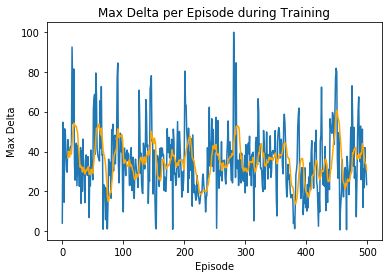

In [13]:
# max delta of each episode, where delta is the change in Q values
plt.plot(delta_list)
plt.title('Max Delta per Episode during Training')
plt.xlabel('Episode')
plt.ylabel('Max Delta')

# plot moving average
delta_frame = pd.DataFrame(delta_list)
rolling_mean = delta_frame.rolling(window=10).mean()
plt.plot(rolling_mean, label='Moving Average', color='orange')

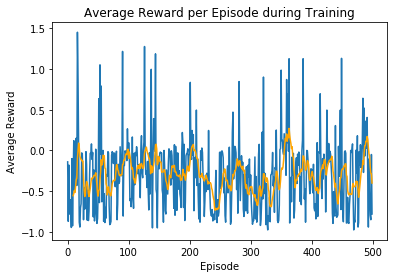

In [14]:
# average reward per episode
plt.plot(average_reward_list)
plt.title('Average Reward per Episode during Training')
plt.xlabel('Episode')
plt.ylabel('Average Reward')

# plot moving average
reward_frame = pd.DataFrame(average_reward_list)
rolling_mean = reward_frame.rolling(window=10).mean()
plt.plot(rolling_mean, label='Moving Average', color='orange')

Text(0, 0.5, 'Cumulative Reward')

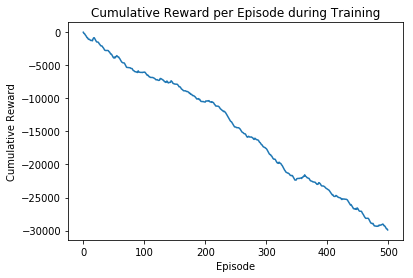

In [15]:
# cumulative reward per episode
plt.plot(cumulative_reward_list)
plt.title('Cumulative Reward per Episode during Training')
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')

In [19]:
np.set_printoptions(precision=4)
Q_values

array([[-23.4418,   0.995 , -23.6574, -27.2783],
       [  2.    ,   0.5263,  14.9582,  -3.6916],
       [ -1.    ,  10.254 ,  16.2491,   3.2298],
       [ -0.3834, -18.9256,  -8.611 ,   0.3333],
       [ -4.8263,  -2.3153,  -1.3083,   1.6583],
       [  1.4143,   0.    ,   0.    , -23.5207],
       [ -4.5675,   0.    ,   0.    ,   1.7911],
       [-13.015 , -22.2772,  -5.0037,   0.    ],
       [ -9.0571,  -9.9017,   0.    , -16.9365],
       [ -8.8388,  -0.1429,  -4.1763,   0.    ],
       [ -1.1376,  -5.602 ,  -0.8275,  -0.0769],
       [-12.2327,  -5.6243, -14.0944,   0.    ],
       [ -5.2127,  -7.0381,  -4.7532,   0.    ],
       [-18.8354,  -7.9627,   0.    ,   0.    ],
       [-12.6528,  -5.6977, -39.3479, -11.683 ],
       [ -5.5792, -15.4113, -12.4603,  -2.7547],
       [-14.6934,  -4.0281, -13.2189, -23.66  ],
       [ -5.3885,  -4.4498,  -5.6463, -18.0595],
       [-15.9644, -18.5296,  -9.4602,  -4.2632],
       [-15.838 , -13.7495, -37.0681, -14.5899],
       [-15.6268, -1

In [17]:
policy

array([[0.03, 0.93, 0.03, 0.03],
       [0.03, 0.03, 0.93, 0.03],
       [0.03, 0.03, 0.93, 0.03],
       [0.03, 0.03, 0.03, 0.93],
       [0.03, 0.03, 0.03, 0.93],
       [0.93, 0.03, 0.03, 0.03],
       [0.03, 0.03, 0.03, 0.93],
       [0.03, 0.03, 0.03, 0.93],
       [0.03, 0.03, 0.93, 0.03],
       [0.03, 0.03, 0.03, 0.93],
       [0.03, 0.03, 0.03, 0.93],
       [0.03, 0.03, 0.03, 0.93],
       [0.03, 0.03, 0.03, 0.93],
       [0.03, 0.03, 0.93, 0.03],
       [0.03, 0.93, 0.03, 0.03],
       [0.03, 0.03, 0.03, 0.93],
       [0.03, 0.93, 0.03, 0.03],
       [0.03, 0.93, 0.03, 0.03],
       [0.03, 0.03, 0.03, 0.93],
       [0.03, 0.93, 0.03, 0.03],
       [0.03, 0.03, 0.93, 0.03],
       [0.03, 0.03, 0.03, 0.93],
       [0.93, 0.03, 0.03, 0.03],
       [0.93, 0.03, 0.03, 0.03],
       [0.03, 0.03, 0.03, 0.93]])

## Visualize Final Policy

In [18]:
# PRINT POLICY TABLE ################################################################################
# import pandas library
import pandas as pd
# define column and index
columns=range(grid.size)
index = range(grid.size)
# define dataframe to represent policy table
policy_table = pd.DataFrame(index = index, columns=columns)

# iterate through policy to make a table that represents action number
# as action name (eg. left, right, up, down)
for state in range(len(policy)):
    
    # find the best action at each state
    best_action = np.argmax(policy[state])

    # get action name
    if best_action == 0:
        action_name = 'up'
    elif best_action == 1:
        action_name = 'right'
    elif best_action == 2:
        action_name = 'down'
    else:
        action_name = 'left'

    # calculate the row and column coordinate of the current state number
    row = int(state/grid.size)
    column = round((state/grid.size - int(state/grid.size))*grid.size)
            
    # assign action name
    policy_table.loc[row][column] = action_name

print("Policy Table: ")
print(policy_table)
print()

Policy Table: 
       0      1      2     3      4
0  right   down   down  left   left
1     up   left   left  down   left
2   left   left   left  down  right
3   left  right  right  left  right
4   down   left     up    up   left

